In [34]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline, FunctionTransformer
from sklearn.compose import ColumnTransformer, make_column_selector

In [35]:
data = pd.read_csv('hospital_readmissions.csv')

In [36]:
def make_clean_data(df: pd.DataFrame) -> pd.DataFrame:
    df = df[df['diag_1'] != 'Missing']
    df = df[df['diag_2'] != 'Missing']
    df = df[df['diag_3'] != 'Missing']

    df['n_lab_procedures_grouped'] = (df['n_lab_procedures'] // 10).astype(int)
    df['n_medications_grouped'] = (df['n_medications'] // 5).astype(int)
    df['n_outpatient'] = df['n_outpatient'].map({0: 0, 1: 1}).fillna(2).astype(int)
    df['n_inpatient'] = df['n_inpatient'].map({0: 0, 1: 1}).fillna(2).astype(int)
    df['n_emergency'] = df['n_emergency'].map({0: 0, 1: 1}).fillna(2).astype(int)

    df = df.drop(columns=['n_lab_procedures',
                          'medical_specialty',
                          'glucose_test',
                          'n_medications'],
                )
    return df

In [37]:
data_cleaner = FunctionTransformer(make_clean_data)
num_preproc = Pipeline([
    ('scaler', MinMaxScaler()),
])
cat_preproc = Pipeline([
    ('ohe', OneHotEncoder(sparse_output=False, drop="if_binary")),
])
preproc = ColumnTransformer([
    ('num_transf', num_preproc, make_column_selector(dtype_include='number')),
    ('cat_transf', cat_preproc, make_column_selector(dtype_include='object')),
], verbose_feature_names_out=False).set_output(transform='pandas')
pipe_preproc = Pipeline([
    ('data_cleaner', data_cleaner),
    ('preprocessor', preproc),
])

pipe_preproc

Pipeline(steps=[('data_cleaner',
                 FunctionTransformer(func=<function make_clean_data at 0x7a42b5571630>)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num_transf',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a42b56cb010>),
                                                 ('cat_transf',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a42b56caf80>)],
                                   verbose_feature_names_out=False))])

In [38]:
preproc_data = pipe_preproc.fit_transform(data)
preproc_data

,time_in_hospital,n_procedures,n_outpatient,n_inpatient,n_emergency,n_lab_procedures_grouped,n_medications_grouped,age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),diag_1_Circulatory,diag_1_Diabetes,diag_1_Digestive,diag_1_Injury,diag_1_Musculoskeletal,diag_1_Other,diag_1_Respiratory,diag_2_Circulatory,diag_2_Diabetes,diag_2_Digestive,diag_2_Injury,diag_2_Musculoskeletal,diag_2_Other,diag_2_Respiratory,diag_3_Circulatory,diag_3_Diabetes,diag_3_Digestive,diag_3_Injury,diag_3_Musculoskeletal,diag_3_Other,diag_3_Respiratory,A1Ctest_high,A1Ctest_no,A1Ctest_normal,change_yes,diabetes_med_yes,readmitted_yes
0,0.538462,0.166667,1.0,0.0,0.0,0.636364,0.200000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.153846,0.333333,0.0,0.0,0.0,0.272727,0.133333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.307692,0.000000,0.0,0.0,0.0,0.363636,0.200000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
3,0.076923,0.000000,0.5,0.0,0.0,0.272727,0.133333,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
4,0.000000,0.000000,0.0,0.0,0.0,0.363636,0.066667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1.000000,0.166667,0.0,0.0,0.0,0.636364,0.400000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
24996,0.076923,0.000000,0.0,0.0,0.0,0.545455,0.266667,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
24997,0.307692,0.000000,0.0,0.5,0.0,0.090909,0.066667,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
24998,0.076923,0.500000,0.0,0.0,0.0,0.545455,0.200000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


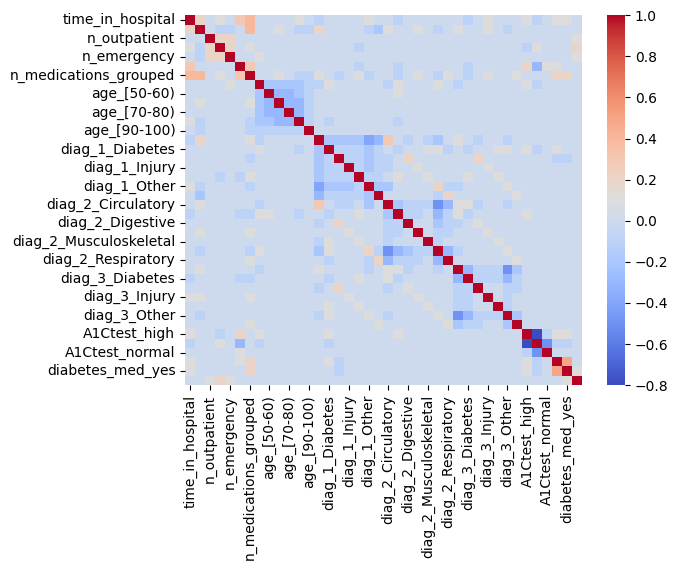

In [22]:
import matplotlib as plt
import seaborn as sns

sns.heatmap(round(preproc_data.corr(),1), cmap = "coolwarm", annot = False);

In [39]:
X = preproc_data.drop(columns='readmitted_yes')
y=preproc_data['readmitted_yes']

# Train-Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [45]:
from tensorflow.keras import Sequential, layers
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(15, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

es= EarlyStopping(
    monitor='binary_accuracy',
    patience=5,
    verbose=0,
    )

history=model.fit(X_train,
                  y_train,
                  batch_size=16,
                  epochs=500,
                  callbacks=[es],
                  verbose= 1
                 )


Epoch 1/500
1239/1239 [==============================] - 5s 3ms/step - loss: 0.6893 - binary_accuracy: 0.5429
Epoch 2/500
1239/1239 [==============================] - 3s 2ms/step - loss: 0.6727 - binary_accuracy: 0.5926
Epoch 3/500
1239/1239 [==============================] - 3s 2ms/step - loss: 0.6673 - binary_accuracy: 0.5977
Epoch 4/500
1239/1239 [==============================] - 4s 3ms/step - loss: 0.6645 - binary_accuracy: 0.6051
Epoch 5/500
1239/1239 [==============================] - 3s 2ms/step - loss: 0.6617 - binary_accuracy: 0.6082
Epoch 6/500
1239/1239 [==============================] - 3s 2ms/step - loss: 0.6605 - binary_accuracy: 0.6105
Epoch 7/500
1239/1239 [==============================] - 3s 2ms/step - loss: 0.6589 - binary_accuracy: 0.6115
Epoch 8/500
1239/1239 [==============================] - 3s 3ms/step - loss: 0.6585 - binary_accuracy: 0.6123
Epoch 9/500
1239/1239 [==============================] - 3s 3ms/step - loss: 0.6578 - binary_accuracy: 0.6118
Epoch 10/5

In [46]:
res = model.evaluate(X_test, y_test)
res

155/155 [==============================] - 1s 2ms/step - loss: 0.6619 - binary_accuracy: 0.5964


[0.6618753671646118, 0.5964487195014954]

In [10]:
#SVC model tuned
from sklearn.svm import SVC
SVC_model = SVC(C= 7.577150682841922,
        gamma=5.94989113083452,
        coef0=1.82140937177523,
        degree=1

        )

SVC_model.fit(X_train,y_train)
SVC_model.score(X_test,y_test)

0.5399515738498789

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
#Predict X test based on the model
y_pred_SVC = SVC_model.predict(X_test)
#Display classification report and confusion matrix
print(classification_report(y_test,y_pred_SVC))
cm=confusion_matrix(y_test, y_pred_SVC)


              precision    recall  f1-score   support

         0.0       0.56      0.67      0.61      2647
         1.0       0.51      0.39      0.44      2309

    accuracy                           0.54      4956
   macro avg       0.53      0.53      0.52      4956
weighted avg       0.53      0.54      0.53      4956



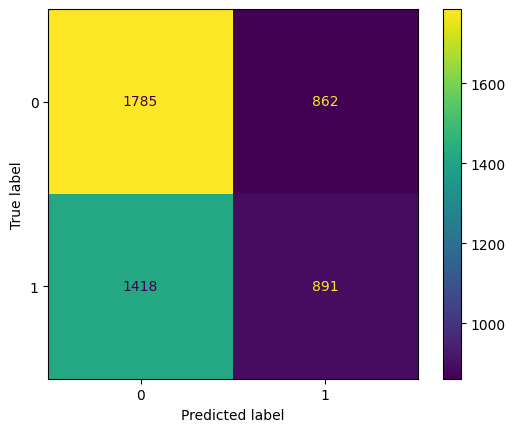

In [21]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=None)
disp.plot()


In [20]:
#LinearSVC
from sklearn.svm import LinearSVC
LinearSVC_model=LinearSVC()
LinearSVC_model.fit(X_train, y_train)
LinearSVC_model.score(X_test,y_test)

0.6109765940274415

In [26]:

#Predict X test based on the model
y_pred_LinearSVC = LinearSVC_model.predict(X_test)


              precision    recall  f1-score   support

         0.0       0.61      0.75      0.67      2647
         1.0       0.61      0.45      0.52      2309

    accuracy                           0.61      4956
   macro avg       0.61      0.60      0.60      4956
weighted avg       0.61      0.61      0.60      4956

[[1998  649]
 [1279 1030]]


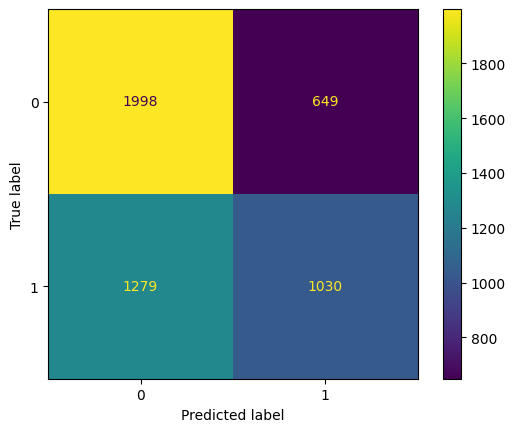

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
#Display classification report and confusion matrix
print(classification_report(y_test,y_pred_LinearSVC))
cmLinearSVC=confusion_matrix(y_test, y_pred_linearSVC)
print(confusion_matrix(y_test, y_pred_LinearSVC))
disp = ConfusionMatrixDisplay(confusion_matrix=cmLinearSVC,
                              display_labels=None)
disp.plot()

In [29]:
#logistic regression model

from sklearn.linear_model import LogisticRegression

# Instanciate model
LR_model = LogisticRegression(max_iter=1000)
LR_model.fit(X_train,y_train)
LR_model.score(X_test,y_test)


0.6099677158999193

In [30]:
#Predict X test based on the model
y_pred_LR = LR_model.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.61      0.75      0.67      2647
         1.0       0.61      0.45      0.52      2309

    accuracy                           0.61      4956
   macro avg       0.61      0.60      0.60      4956
weighted avg       0.61      0.61      0.60      4956

[[1987  660]
 [1273 1036]]


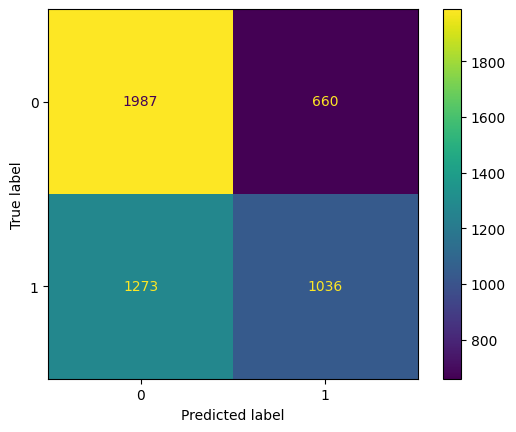

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
#Display classification report and confusion matrix
print(classification_report(y_test,y_pred_LR))
cmLR=confusion_matrix(y_test, y_pred_LR)
print(confusion_matrix(y_test, y_pred_LR))
disp = ConfusionMatrixDisplay(confusion_matrix=cmLR,
                              display_labels=None)
disp.plot()

In [34]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
neigh.score(X_test,y_test)

0.5516545601291364

In [35]:
#Predict X test based on the model
y_pred_KNN = neigh.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.57      0.64      0.61      2647
         1.0       0.52      0.45      0.48      2309

    accuracy                           0.55      4956
   macro avg       0.55      0.54      0.54      4956
weighted avg       0.55      0.55      0.55      4956

[[1706  941]
 [1281 1028]]


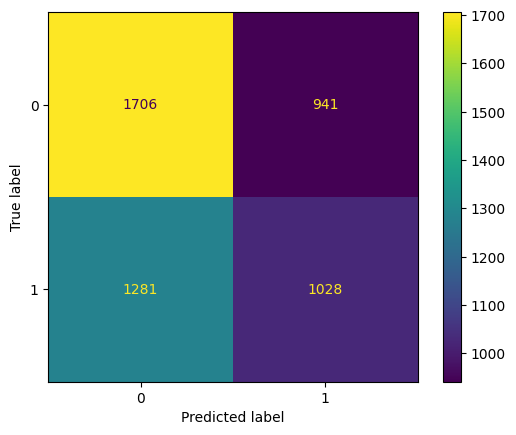

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
#Display classification report and confusion matrix
print(classification_report(y_test,y_pred_KNN))
cmKNN=confusion_matrix(y_test, y_pred_KNN)
print(confusion_matrix(y_test, y_pred_KNN))
disp = ConfusionMatrixDisplay(confusion_matrix=cmKNN,
                              display_labels=None)
disp.plot()